# MyND Offline Processing: Data Analysis
Author: Geeling Chau<br> 
<br>
Description: Visualize power by time over trials<br>
Sources: 
- Ollie's Segment Speller Offline Processing Code https://github.com/ollie-d/SegSpeller/blob/master/Offline%20Processing.ipynb 
- neurodsp https://github.com/neurodsp-tools/neurodsp
- FOOOF https://fooof-tools.github.io/fooof/index.html 
- PyEEG http://pyeeg.sourceforge.net/ 


## Imports

In [1]:
from helperFunctions import *
from constants import *
from dataAnalysisFunctions import *

from neurodsp.plts.spectral import *

import warnings
warnings.filterwarnings('ignore')

## Data imports

In [2]:
filename_foldername_dict_path = "../data/most_currently_updated.pickle"
filename_foldername_dict = loadPickle(filename_foldername_dict_path)

foldername="P006" #filename_foldername_dict["foldername"]
filename="part_P006_exp001_block_short"#filename_foldername_dict["filename"]
print(foldername, filename)

dataframe_directory = "../data/dataframe/"+foldername+"/"
dataframe_path = dataframe_directory+filename+".pickle"

df = loadPickle(dataframe_path)



P006 part_P006_exp001_block_short


In [3]:
incorporate_matlab_data = False
if incorporate_matlab_data: 
    filtered_matlab_data_directory = "../data/filtered_matlab_data/"+foldername+"/"
    filtered_matlab_data_path = filtered_matlab_data_directory+filename+".pickle"
    filtered_matlab_data = loadPickle(filtered_matlab_data_path)
    all_data = filtered_matlab_data
    data_type="data_matlab_extended"
else :
    filtered_cleaned_data_directory = "../data/filtered_cleaned_data/"+foldername+"/"
    filtered_cleaned_data_path = filtered_cleaned_data_directory+filename+".pickle"
    filtered_cleaned_data = loadPickle(filtered_cleaned_data_path)
    all_data = filtered_cleaned_data
    data_type="data_extended"

In [4]:
eeg_fs = 250#getEEGfs(filtered_cleaned_data)
beta = (12, 30)
theta = (4, 8)

In [5]:
right_eeg = all_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['right_eeg']]
left_eeg = all_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['left_eeg']]


In [6]:
# Get sections
numSections = getNumSections(all_data)
article_sections = list()
for i in range(numSections) : 
    article_sections.append(getArticleSectionData("response", i, all_data))

# Get timestamps
timestamps = filtered_cleaned_data[StreamType.EEG.value][StreamType.TIME.value]

front_cut_off = 1000
end_cut_off = -1000


## Phase by Time

In [7]:
# Get phase by time

right_alpha_phase_by_time = phase_by_time(right_eeg, eeg_fs, alpha)
left_alpha_phase_by_time = phase_by_time(left_eeg, eeg_fs, alpha)



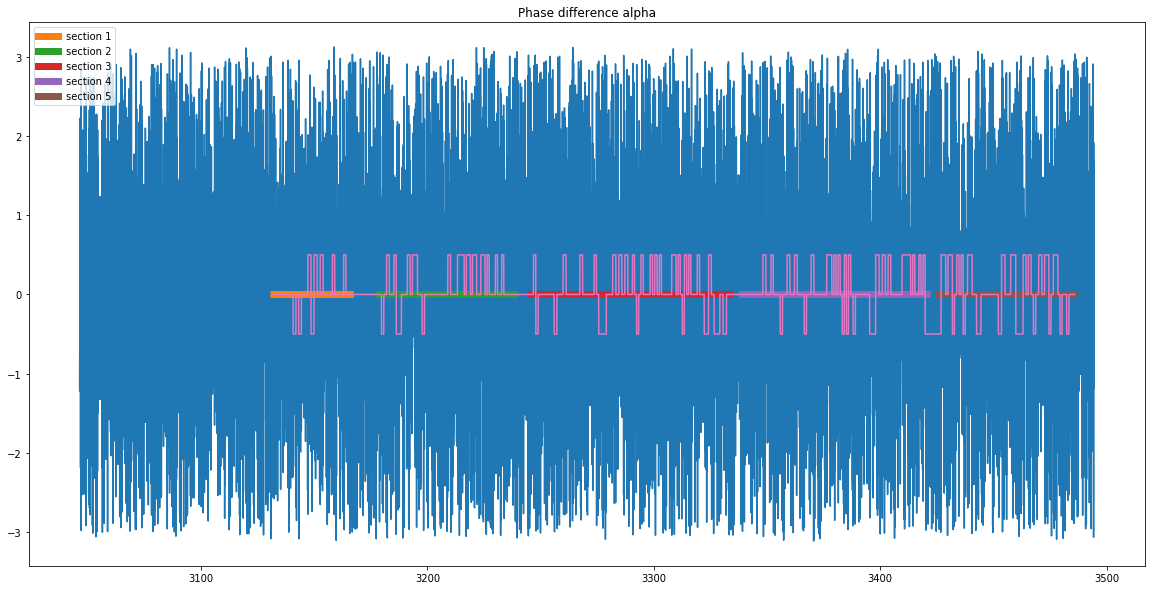

In [8]:
# Plot phase by time
plt.figure(figsize=(20,10))

plt.plot(timestamps[front_cut_off:end_cut_off], (np.abs(right_alpha_phase_by_time) - np.abs(left_alpha_phase_by_time))[front_cut_off:end_cut_off])
section_number = 1
for section in article_sections: 
    time_data = section[StreamType.EEG.value][StreamType.TIME.value]
    line = [0]*(time_data)
    plt.plot(time_data, line, linewidth=7.0, label="section " + str(section_number))
    section_number += 1
    
# Plot points
timepoints = []
points = []
for i, row in df.iterrows():
    data = row["data"]
    time = data[StreamType.EEG.value][StreamType.TIME.value]
    point = int(row["points"])
    timepoints.extend(time)
    points.extend([point]*len(time))
plt.plot(timepoints, np.array(points) * 0.5)
plt.legend()
plt.title("Phase difference alpha")
plt.show()

In [9]:
# Get phase by time

right_theta_phase_by_time = phase_by_time(right_eeg, eeg_fs, theta)
left_theta_phase_by_time = phase_by_time(left_eeg, eeg_fs, theta)


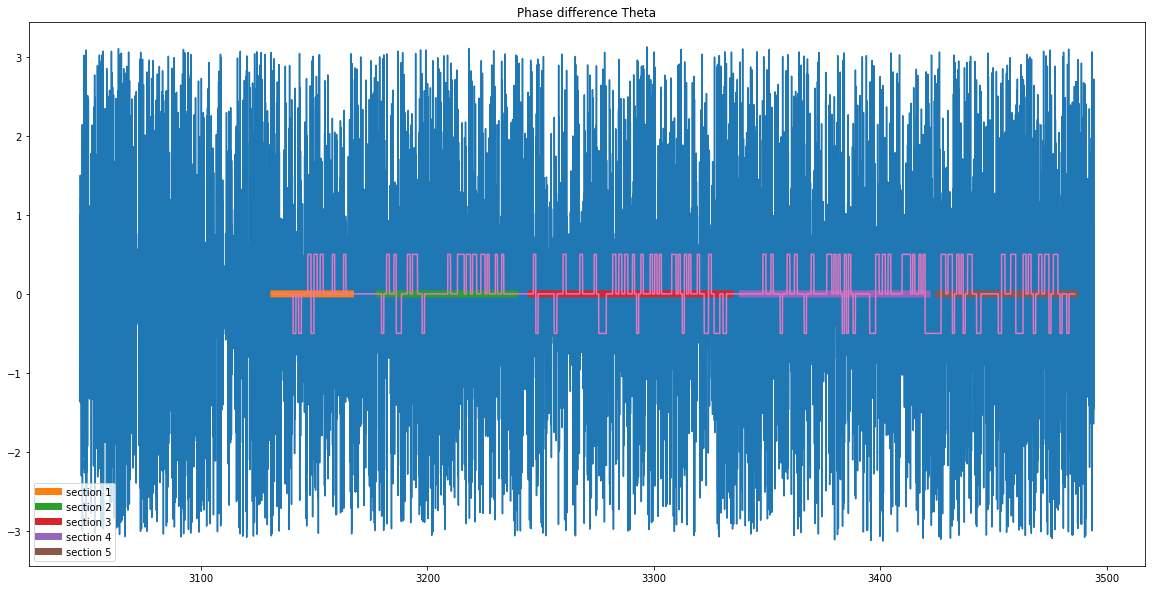

In [10]:
# Plot phase by time

plt.figure(figsize=(20,10))

plt.plot(timestamps[front_cut_off:end_cut_off], (np.abs(right_theta_phase_by_time) - np.abs(left_theta_phase_by_time))[front_cut_off:end_cut_off])
section_number = 1
for section in article_sections: 
    time_data = section[StreamType.EEG.value][StreamType.TIME.value]
    line = [0]*(time_data)
    plt.plot(time_data, line, linewidth=7.0, label="section " + str(section_number))
    section_number += 1
    
# Plot points
timepoints = []
points = []
for i, row in df.iterrows():
    data = row["data"]
    time = data[StreamType.EEG.value][StreamType.TIME.value]
    point = int(row["points"])
    timepoints.extend(time)
    points.extend([point]*len(time))
plt.plot(timepoints, np.array(points) * 0.5)
plt.legend()
plt.title("Phase difference Theta")
plt.show()




## Amp by Time

In [11]:
# Alpha over the entire recording
amp_right_alpha = amp_by_time(right_eeg, eeg_fs, alpha)
amp_left_alpha = amp_by_time(left_eeg, eeg_fs, alpha)

amp_avg_alpha = np.mean([amp_right_alpha, amp_left_alpha], axis=0)
diff_avg_alpha = amp_right_alpha - amp_left_alpha

# Theta over the entire recording
amp_right_theta = amp_by_time(right_eeg, eeg_fs, theta)
amp_left_theta = amp_by_time(left_eeg, eeg_fs, theta)

amp_avg_theta = np.mean([amp_right_theta, amp_left_theta], axis=0)
diff_avg_theta = amp_right_theta - amp_left_theta

# Beta over the entire recording
amp_right_beta = amp_by_time(right_eeg, eeg_fs, beta)
amp_left_beta = amp_by_time(left_eeg, eeg_fs, beta)

amp_avg_beta = np.mean([amp_right_beta, amp_left_beta], axis=0)
diff_avg_beta = amp_right_beta - amp_left_beta

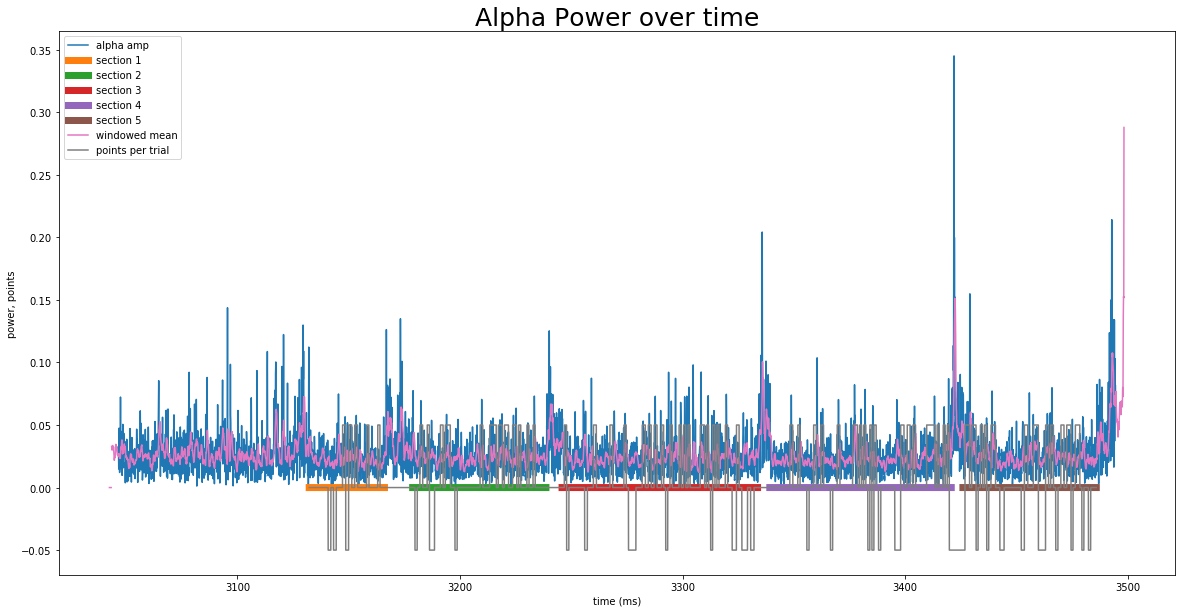

In [12]:
# Plot avg amplitude 

plt.figure(figsize=(20,10))
plt.plot(timestamps[front_cut_off:end_cut_off], amp_avg_alpha[front_cut_off:end_cut_off], label="alpha amp")

section_number = 1
for section in article_sections: 
    time_data = section[StreamType.EEG.value][StreamType.TIME.value]
    line = [0]*(time_data)
    plt.plot(time_data, line, linewidth=7.0, label="section " + str(section_number))
    section_number += 1

num_to_average = 200
windowed_mean = list() 
for i, amp in enumerate(amp_avg_alpha): 
    if i < num_to_average: 
        windowed_mean.append(0)
    else :
        windowed_mean.append(np.mean(amp_avg_alpha[i-num_to_average: i]))
plt.plot(timestamps, windowed_mean, label="windowed mean")

    
# Plot points
timepoints = []
points = []
for i, row in df.iterrows():
    data = row["data"]
    time = data[StreamType.EEG.value][StreamType.TIME.value]
    point = int(row["points"])
    timepoints.extend(time)
    points.extend([point]*len(time))
plt.plot(timepoints, np.array(points) * 0.05, label="points per trial")
plt.legend()

plt.title("Alpha Power over time", size=25)
plt.ylabel("power, points")
plt.xlabel("time (ms)")

plt.show()



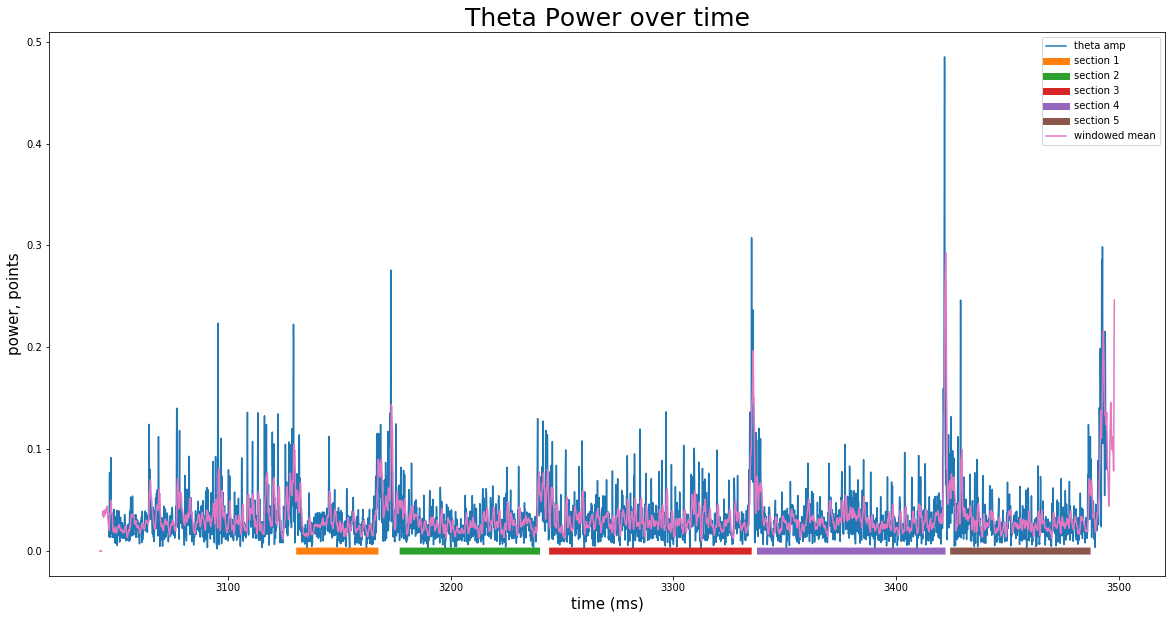

In [13]:
# Plot Avg amplitude theta
plt.figure(figsize=(20,10))
# amp_avg_theta_filt = filt.filter_signal(amp_avg_theta, 250, 'bandpass', theta, filter_type='iir', butterworth_order=2)
plt.plot(timestamps[front_cut_off:end_cut_off], amp_avg_theta[front_cut_off:end_cut_off], label="theta amp")

section_number = 1
for section in article_sections: 
    time_data = section[StreamType.EEG.value][StreamType.TIME.value]
    line = [0]*(time_data)
    plt.plot(time_data, line, linewidth=7.0, label="section " + str(section_number))
    section_number += 1


num_to_average = 200
windowed_mean = list() 
for i, amp in enumerate(amp_avg_theta): 
    if i < num_to_average: 
        windowed_mean.append(0)
    else :
        windowed_mean.append(np.mean(amp_avg_theta[i-num_to_average: i]))
plt.plot(timestamps, windowed_mean, label="windowed mean")


# Plot points
timepoints = []
points = []
for i, row in df.iterrows():
    data = row["data"]
    time = data[StreamType.EEG.value][StreamType.TIME.value]
    point = int(row["points"])
    timepoints.extend(time)
    points.extend([point]*len(time))
#plt.plot(timepoints, np.array(points) * 0.05, label="points per trial")
plt.legend()

plt.title("Theta Power over time", size=25)
plt.ylabel("power, points", size=15)
plt.xlabel("time (ms)", size=15)
plt.show()

In [14]:
def smoothedPoints(original_points):
    decay_trials = 3
    decrement_amount = 1/decay_trials
    current_amount = 0
    smoothed_points = []
    for point in np.flip(np.array(original_points)):
        if point > 0 :
            if current_amount >= 0 :
                smoothed_points.append(1)
            else : 
                smoothed_points.append(-1)
            current_amount += 0.5
        if point < 0: 
            if current_amount <= 0:
                smoothed_points.append(-1)
            else: 
                smoothed_points.append(1)
            current_amount -= 0.5
        if point == 0: 
            if current_amount > 0: 
                smoothed_points.append(1)
                current_amount = max(0, current_amount - decrement_amount)
            elif current_amount < 0: 
                smoothed_points.append(-1)
                current_amount = min(0, current_amount + decrement_amount)
            else: 
                smoothed_points.append(0 if len(smoothed_points) < 1 else smoothed_points[-1])
    to_return_smoothed_points = np.flip(smoothed_points)
    for i, point in enumerate(to_return_smoothed_points):
        if point == 0:
            to_return_smoothed_points[i] = to_return_smoothed_points[i-1]
    return to_return_smoothed_points

In [15]:
# Get and plot amp by time
def plotAmpByTime(original_data, band):
    #plt.figure(figsize=(20,10))
    right_eeg = original_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['right_eeg']]
    left_eeg = original_data[StreamType.EEG.value][StreamType.DATA.value][:, channels['left_eeg']]
    timpoints = original_data[StreamType.EEG.value][StreamType.TIME.value]
    amp_right = amp_by_time(right_eeg, eeg_fs, band)
    amp_left = amp_by_time(left_eeg, eeg_fs, band)
    
    amp_avg = np.mean([amp_right, amp_left], axis=0)
    
    num_to_average = 200
    windowed_mean = list() 
    for i, amp in enumerate(amp_avg): 
        if i < num_to_average: 
            windowed_mean.append(0)
        else :
            windowed_mean.append(np.mean(amp_avg[i-num_to_average: i]))
    plt.plot(timpoints, amp_avg, label="amp average")
    plt.plot(timpoints, windowed_mean, label="windowed mean")

    
    start_time = original_data[StreamType.MARKER.value][StreamType.TIME.value][0]
    end_time = original_data[StreamType.MARKER.value][StreamType.TIME.value][-1]

    trials = df[((df["time"] >= start_time) & (df["time"] <= end_time))]
    # Plot points
    timepoints = []
    points = []
    for i, row in trials.iterrows():
        data = row["data"]
        time = data[StreamType.EEG.value][StreamType.TIME.value]
        point = int(row["points"])
        timepoints.extend(time)
        points.extend([point]*len(time))
    plt.plot(timepoints, np.array(points) * 0.05, label="points per trial")
    
    smoothed_points = smoothedPoints(points)
    plt.plot(timepoints, np.array(smoothed_points) * 0.05, label="smoothed points")
    
    plt.legend()
    

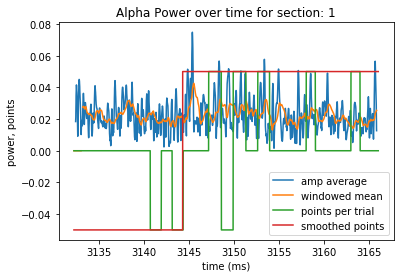

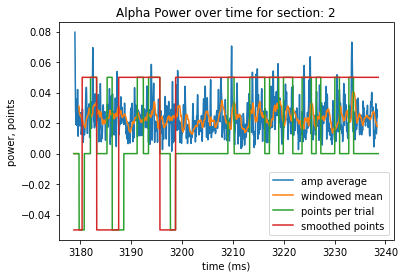

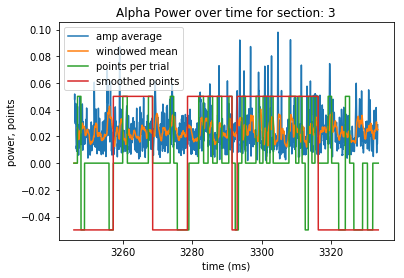

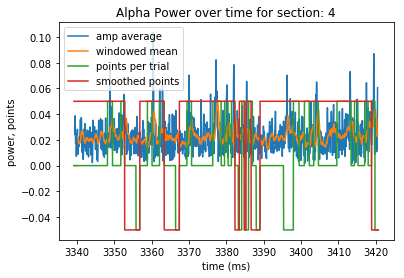

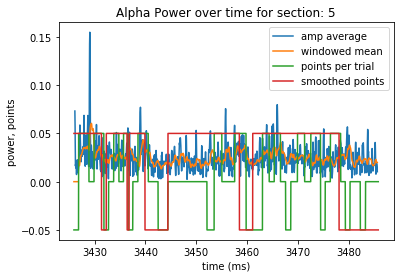

In [16]:
for i, section in enumerate(article_sections): 
    plotAmpByTime(section, alpha)
    plt.title("Alpha Power over time for section: " + str(i+1))
    plt.ylabel("power, points")
    plt.xlabel("time (ms)")

    plt.show()


In [17]:
def getTimeBalanced(df1, df2, window_size=10) :
    # Returns data frames that contain equal number of elements from df1 and df2 and has them be in the nearest time intervals
    start_1 = df1.iloc[0]["data_index"]
    start_2 = df2.iloc[0]["data_index"]
    # Find minimum of the two starting indexes
    min_ind = start_1 if start_1 < start_2 else start_2
    max_ind = min_ind + window_size
    
    df1_to_return_indexes = list()
    df2_to_return_indexes = list()
    
    df1_copy = df1.copy()
    df2_copy = df2.copy()
    max_data_index = max(df1["data_index"]) if max(df1["data_index"]) > max(df2["data_index"]) else max(df2["data_index"])
    # print(max_data_index)
    while min_ind < max_data_index : 
        # get sublists
        sub_df1 = df1_copy[(df1_copy["data_index"] >= min_ind) & (df1_copy["data_index"] < max_ind)]
        sub_df2 = df2_copy[(df2_copy["data_index"] >= min_ind) & (df2_copy["data_index"] < max_ind)]

        # if any of the sub lists are empty, increment min index
        if (len(sub_df1) == 0) or (len(sub_df2) == 0): 
            min_ind += 1
        else :
            # Otherwise, continue poping from both lists until one is empty, by which you increase min_index to after the numbers just added
            df1_to_add = sub_df1.iloc[0]["data_index"]
            df2_to_add = sub_df2.iloc[0]["data_index"]
            while not((len(sub_df1) == 0) or (len(sub_df2) == 0)): 
                df1_to_add = sub_df1.iloc[0]["data_index"]
                df2_to_add = sub_df2.iloc[0]["data_index"]

                df1_to_return_indexes.append(df1_to_add)
                df2_to_return_indexes.append(df2_to_add)

                sub_df1 = sub_df1[sub_df1["data_index"] != df1_to_add]
                sub_df2 = sub_df2[sub_df2["data_index"] != df2_to_add]
                df1_copy = df1_copy[df1_copy["data_index"] != df1_to_add]
                df2_copy = df2_copy[df2_copy["data_index"] != df2_to_add]

            min_ind += 1

        max_ind = min_ind + window_size
    # print(df1_to_return_indexes)
    return df1[df1["data_index"].isin(df1_to_return_indexes)], df2[df2["data_index"].isin(df2_to_return_indexes)]



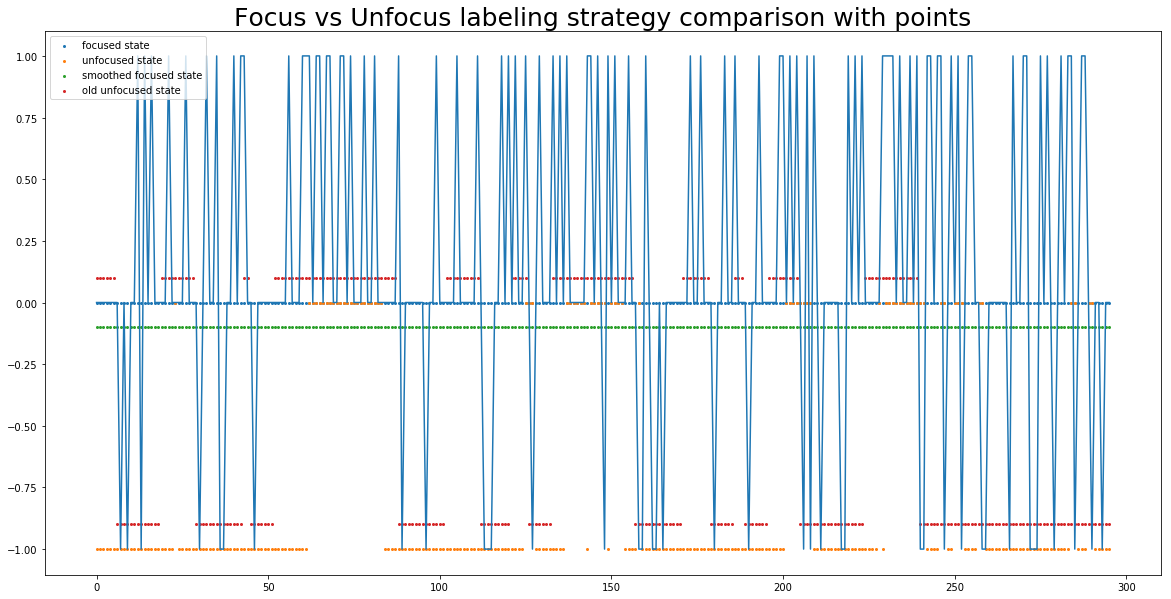

In [18]:
focused_state = df["trial_time"] == 0.7
unfocused_state = df["trial_time"] > 0.9
smoothed_focused_state = getSmoothedPerformance(df["trial_time"] == 0.7, 3, 1)#[True if val > 0 else False for val in smoothedPoints(df["points"].values)]
old_unfocused_state = getSmoothedPerformance((df["is_pressed"] == False) & (df["is_target"] == True), 5, 1)


plt.figure(figsize=(20,10))
plt.title("Focus vs Unfocus labeling strategy comparison with points", size=25)


plt.plot(df["points"].values)
plt.scatter(list(range(len(focused_state))), focused_state , label="focused state", s=4)
plt.scatter(list(range(len(unfocused_state))), np.logical_not(unfocused_state) - 1, label="unfocused state", s=4)
plt.scatter(list(range(len(smoothed_focused_state))), np.array(smoothed_focused_state) - 0.1, label="smoothed focused state", s=4)
plt.scatter(list(range(len(old_unfocused_state))), np.logical_not(old_unfocused_state) - 0.9, label="old unfocused state", s=4)

plt.legend()
plt.show()

In [19]:
# Using trial time

unfocused_df = df[unfocused_state]
focused_df = df[focused_state]
f_df, u_df = getTimeBalanced(focused_df, unfocused_df, window_size=10)

plt.figure(figsize=(20,3))
plt.title("Trial Time focus group differentiation", size=25)

# plot distribution 
plt.scatter(focused_df["data_index"].values, [1.03]*len(focused_df["data_index"].values), label="focus")
plt.scatter(unfocused_df["data_index"].values, [1]*len(unfocused_df["data_index"].values), label="unfocus")

plt.scatter(f_df["data_index"].values, [0.03]*len(f_df["data_index"].values), label="focus selected")
plt.scatter(u_df["data_index"].values, [0]*len(u_df["data_index"].values), label="unfocus selected")
plt.legend() 
plt.show()

print("alpha")
compareDFs([ f_df, u_df],["focused", "unfocused"], band=alpha, data_type=data_type)
print("theta")
compareDFs([ f_df, u_df],[ "focused",  "unfocused"], band=theta, data_type=data_type)



IndexError: single positional indexer is out-of-bounds

In [ ]:
# # Using smoothed trial time == 0.7

unfocused_df = df[np.logical_not(smoothed_focused_state)] 
focused_df = df[smoothed_focused_state] 
f_df, u_df = getTimeBalanced(focused_df, unfocused_df, window_size=10)

plt.figure(figsize=(20,3))
plt.title("Smoothed Trial Time focus group differentiation", size=25)

# plot distribution 
plt.scatter(focused_df["data_index"].values, [1.03]*len(focused_df["data_index"].values), label="focus")
plt.scatter(unfocused_df["data_index"].values, [1]*len(unfocused_df["data_index"].values), label="unfocus")

plt.scatter(f_df["data_index"].values, [0.03]*len(f_df["data_index"].values), label="focus selected")
plt.scatter(u_df["data_index"].values, [0]*len(u_df["data_index"].values), label="unfocus selected")
plt.legend() 
plt.show()

print("alpha")
compareDFs([ f_df, u_df],["focused", "unfocused"], band=alpha, data_type=data_type)
print("theta")
compareDFs([ f_df, u_df],[ "focused",  "unfocused"], band=theta, data_type=data_type)


In [ ]:
# # Using performance
unfocused_df = df[old_unfocused_state]
focused_df = df[np.logical_not(old_unfocused_state)]

f_df, u_df = getTimeBalanced(unfocused_df, focused_df, window_size=10)

plt.figure(figsize=(20,3))
plt.title("Performance focus group differentiation", size=25)

# plot distribution 
plt.scatter(focused_df["data_index"].values, [1.03]*len(focused_df["data_index"].values), label="focus")
plt.scatter(unfocused_df["data_index"].values, [1]*len(unfocused_df["data_index"].values), label="unfocus")

plt.scatter(f_df["data_index"].values, [0.03]*len(f_df["data_index"].values), label="focus selected")
plt.scatter(u_df["data_index"].values, [0]*len(u_df["data_index"].values), label="unfocus selected")
plt.legend() 
plt.show()

print("alpha")
compareDFs([ f_df, u_df],["focused", "unfocused"], band=alpha, data_type=data_type)
print("theta")
compareDFs([ f_df, u_df],[ "focused",  "unfocused"], band=theta, data_type=data_type)


In [ ]:
correct_df = df[(df["is_pressed"] == True) & (df["is_target"] == True)] 
missed_df = df[(df["is_pressed"] == False) & (df["is_target"] == True)] 
print("alpha")
compareDFs([df, correct_df, missed_df],["all", "correct", "missed"], band=alpha, data_type=data_type)
print("theta")
compareDFs([df, correct_df, missed_df],["all", "correct", "missed"], band=theta, data_type=data_type)


In [ ]:
slow_react_df = df[(df["is_pressed"] == True) & (df["is_target"] == True) & (df["reaction_time"] > 0.6)] 
fast_react_df = df[(df["is_pressed"] == True) & (df["is_target"] == True) & (df["reaction_time"] < 0.6)] 
print("alpha")
compareDFs([df, slow_react_df, fast_react_df],["all", "slow", "fast"], band=alpha, data_type=data_type)
print("theta")
compareDFs([df, slow_react_df, fast_react_df],["all", "slow", "fast"], band=theta, data_type=data_type)


In [ ]:
error_df = df[(df["points"] < 0)]
good_df = df[(df["points"] > 0)]
print("alpha")
compareDFs([df, error_df, good_df],["all", "error", "good"], band=alpha, data_type=data_type)
print("theta")
compareDFs([df, error_df, good_df],["all", "error", "good"], band=theta, data_type=data_type)



In [ ]:
meme_df = df[(df["has_meme"] == True)]
nomeme_df = df[(df["has_meme"] == False)]
print("alpha")
compareDFs([df, meme_df, nomeme_df],["all", "meme", "nomeme"], band=alpha, data_type=data_type)
print("theta")
compareDFs([df, meme_df, nomeme_df],["all", "meme", "nomeme"], band=theta, data_type=data_type)
